In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import generator as gen
import optimizer as opt
import numpy as np
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
kappa = 100
n = 20
d = 5
A = gen.generate_A(n, d)
alpha = 0.9
sigma1 = 0.1
sigma2 = 2.0

tracking_errs1 = opt.gradient_descent_experiment(A, alpha, n, d, sigma1, iters=50, projected=False)
tracking_errs2 = opt.gradient_descent_experiment(A, alpha, n, d, sigma2, iters=50, projected=False)

In [4]:
rho = np.abs(1 - alpha/kappa)
err0 = np.linalg.norm(tracking_errs1[0])

bounds1 = [rho**t * err0 + sigma1 * (1 - rho**t)/(1-rho) for t in range(len(tracking_errs1))]
bounds2 = [rho**t * err0 + sigma2 * (1 - rho**t)/(1-rho) for t in range(len(tracking_errs1))]

Text(0, 0.5, '$||x_t - x_t^*||_2$')

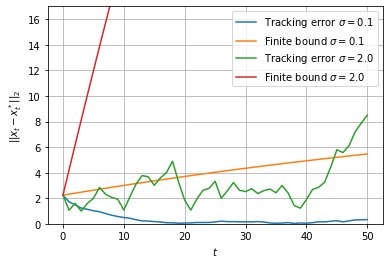

In [6]:
plt.plot(range(len(tracking_errs1)), tracking_errs1, label="Tracking error $\sigma = 0.1$")
plt.plot(range(len(tracking_errs1)), bounds1, label="Finite bound $\sigma = 0.1$")

plt.plot(range(len(tracking_errs1)), tracking_errs2, label="Tracking error $\sigma = 2.0$")
plt.plot(range(len(tracking_errs1)), bounds2, label="Finite bound $\sigma = 2.0$")

#plt.axhline(1/(1-rho), linestyle='--', label="Asymptotic bound")
plt.grid()
plt.ylim([0, max(tracking_errs2)*2])
plt.legend()

plt.xlabel("$t$")
plt.ylabel("$||x_t - x_t^*||_2$")